In [50]:
import pandas as pd  # pandas: for handling data in DataFrames
import numpy as np  # numpy: for numerical operations
import matplotlib.pyplot as plt  # matplotlib: for plotting data
from sklearn.metrics.pairwise import cosine_similarity  # sklearn: for cosine similarity computation
from tqdm import tqdm  # tqdm: for progress bars
import random  # random: for random operations
import os  # os: for operating system interfaces
from pyteomics import mgf  # pyteomics: for handling MGF files
import plotly.graph_objects as go  # plotly: for interactive plots
from itertools import cycle  # itertools: for creating iterators

In [48]:
import matplotlib.pyplot as plt

def plot_ms_spectra_direct_read(mgf_file, feature_ids, mz_min=None, mz_max=None):
    found_spectra = False  # Flag to check if any matching spectra are found
    mz_values = []
    intensity_values = []
    current_feature_id = None

    with open(mgf_file, 'r') as file:
        for line in file:
            line = line.strip()
            
            # Start a new spectrum
            if line == "BEGIN IONS":
                mz_values = []
                intensity_values = []
                current_feature_id = None
            
            # Check for FEATURE_ID
            elif line.startswith("FEATURE_ID="):
                current_feature_id = line.split("=")[1].strip()
            
            # Parse m/z and intensity pairs
            elif line and not line.startswith("END IONS") and not line.startswith("FEATURE_ID"):
                try:
                    mz, intensity = line.split()
                    mz_values.append(float(mz))
                    intensity_values.append(float(intensity))
                except ValueError:
                    continue
            
            # End of a spectrum, check if it matches the desired FEATURE_ID
            elif line == "END IONS" and current_feature_id in feature_ids:
                found_spectra = True
                plt.figure(figsize=(10, 3))
                plt.stem(mz_values, intensity_values, markerfmt=" ", basefmt=" ")
                plt.xlabel('m/z')
                plt.ylabel('Intensity')
                plt.title(f'Spectrum for FEATURE_ID: {current_feature_id}')
                
                # Set spectral window if specified
                if mz_min is not None and mz_max is not None:
                    plt.xlim(mz_min, mz_max)
                
                plt.show()

    if not found_spectra:
        print("No matching FEATURE_IDs found in the file.")


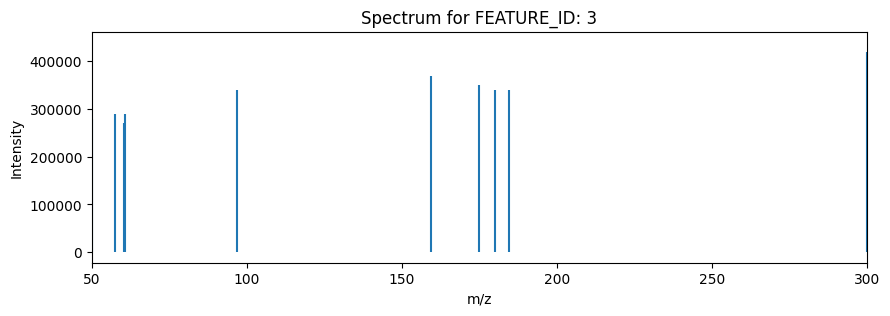

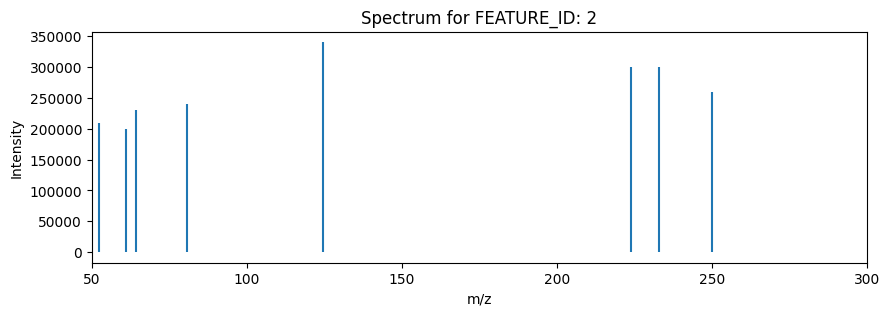

In [61]:

# List of MGF files and feature IDs
mgf_feature_pairs = [
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_1_2024_10_02.mgf', ['3']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_2_2024_10_02.mgf', ['2']),
    #(r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_3_2024_10_08.mgf', ['27']),
    #(r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_4_2024_10_08.mgf', ['21'])
]

# Loop over each file-feature pair and plot
for mgf_file, feature_ids in mgf_feature_pairs:
    plot_ms_spectra_direct_read(mgf_file, feature_ids, mz_min=50, mz_max=300)


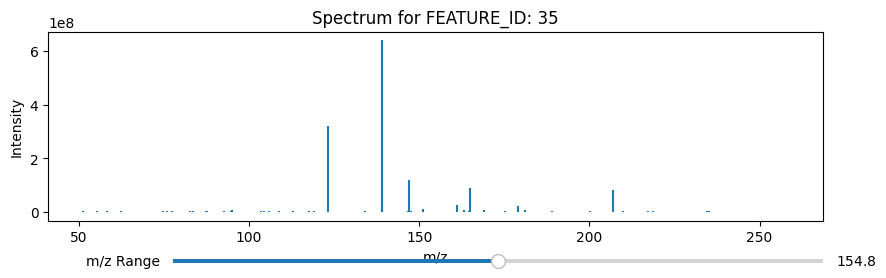

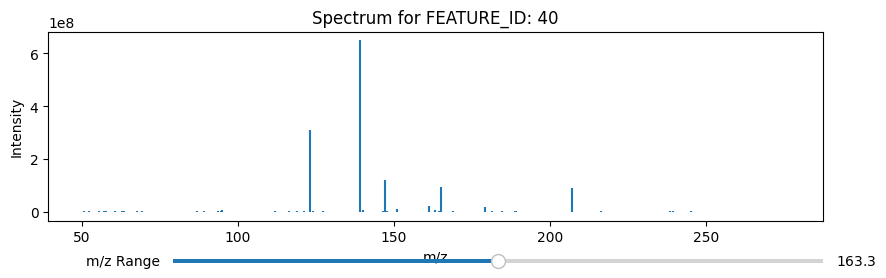

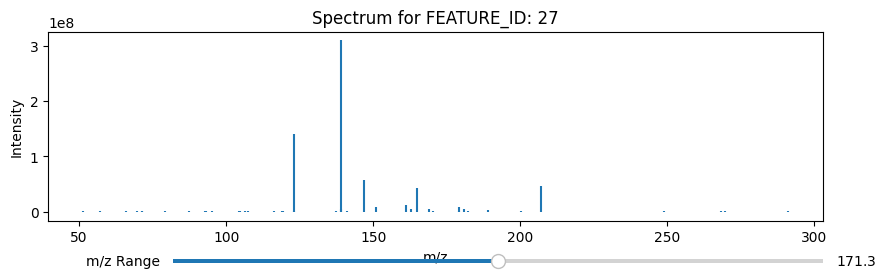

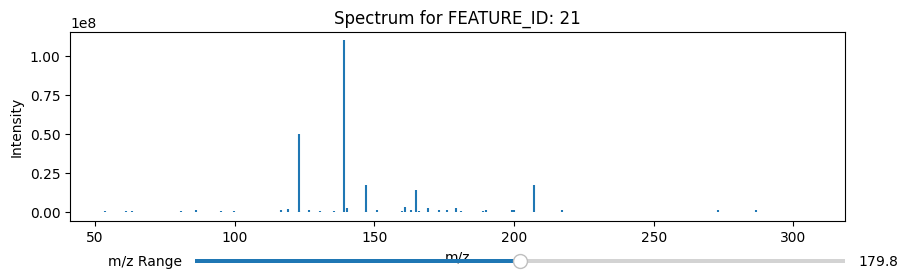

In [42]:
# List of MGF files and feature IDs
mgf_feature_pairs = [
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_1_2024_10_02.mgf', ['35']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_2_2024_10_02.mgf', ['40']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_3_2024_10_08.mgf', ['27']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_4_2024_10_08.mgf', ['21'])
]

# Loop over each file-feature pair and plot with zoom
for mgf_file, feature_ids in mgf_feature_pairs:
    plot_ms_spectra_with_zoom(mgf_file, feature_ids)


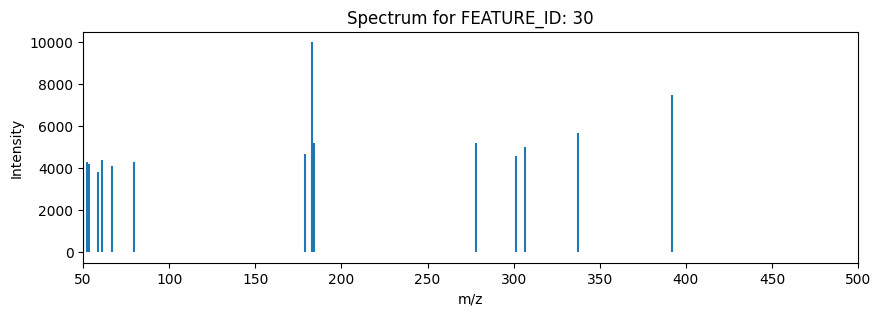

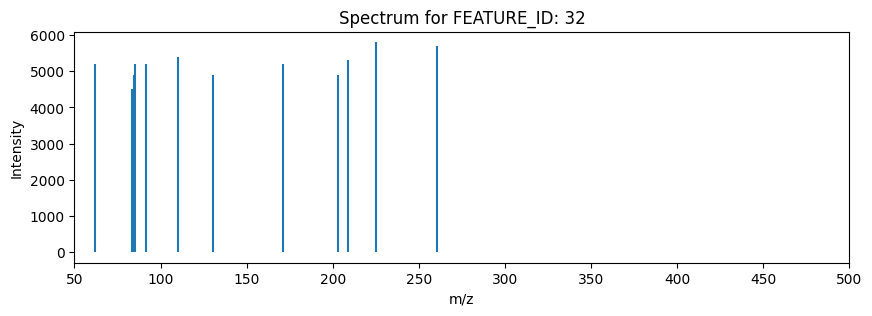

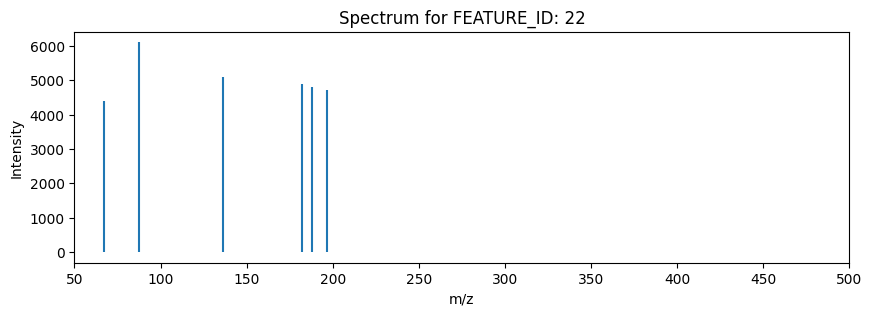

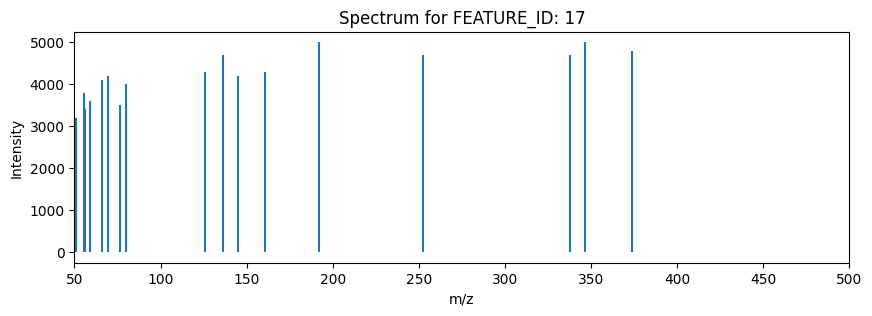

In [53]:
# List of MGF files and feature IDs
mgf_feature_pairs = [
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_1_2024_10_02.mgf', ['30']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_2_2024_10_02.mgf', ['32']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_3_2024_10_08.mgf', ['22']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_4_2024_10_08.mgf', ['17'])
]

# Loop over each file-feature pair and plot
for mgf_file, feature_ids in mgf_feature_pairs:
    plot_ms_spectra_direct_read(mgf_file, feature_ids, mz_min=50, mz_max=500)


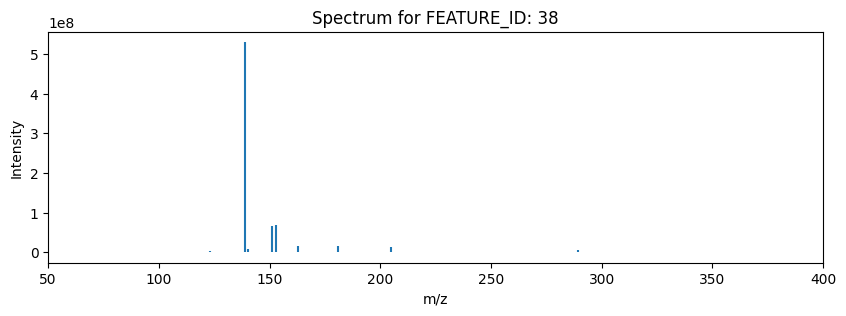

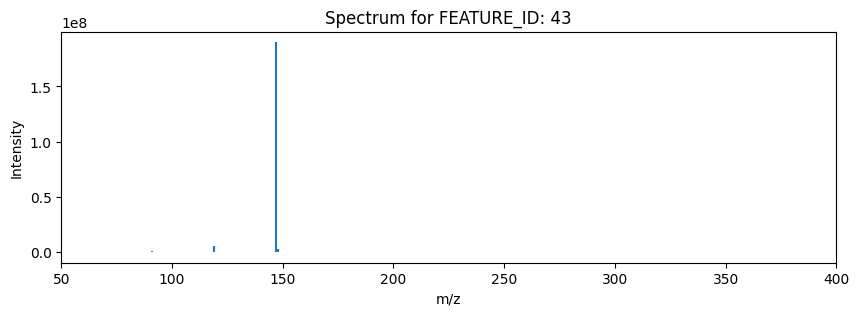

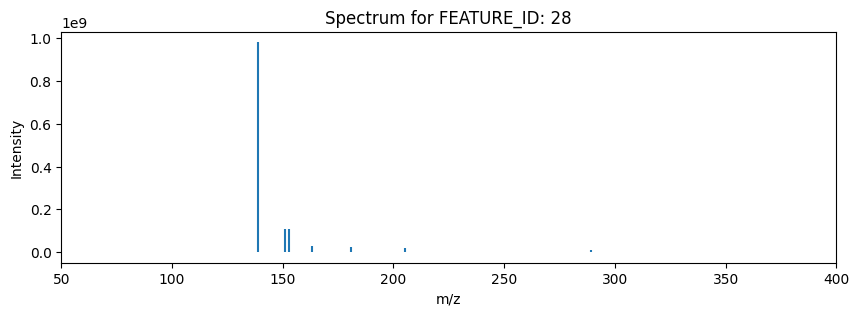

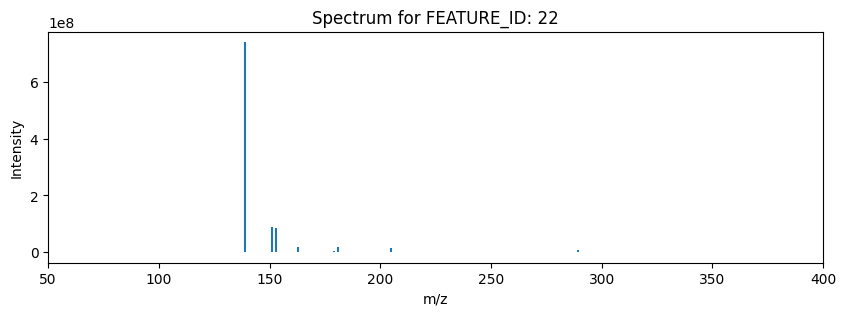

In [54]:
# List of MGF files and feature IDs
mgf_feature_pairs = [
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_1_2024_10_02.mgf', ['38']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_2_2024_10_02.mgf', ['43']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_3_2024_10_08.mgf', ['28']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_4_2024_10_08.mgf', ['22'])
]

# Loop over each file-feature pair and plot
for mgf_file, feature_ids in mgf_feature_pairs:
    plot_ms_spectra_direct_read(mgf_file, feature_ids, mz_min=50, mz_max=400)


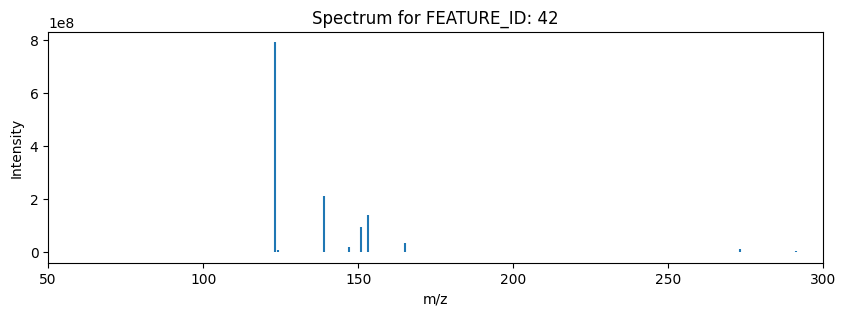

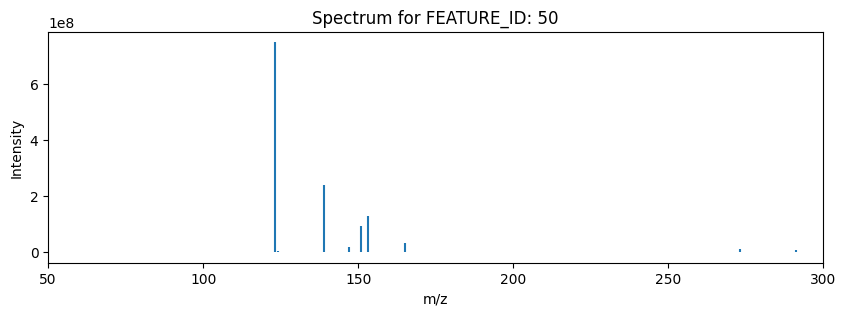

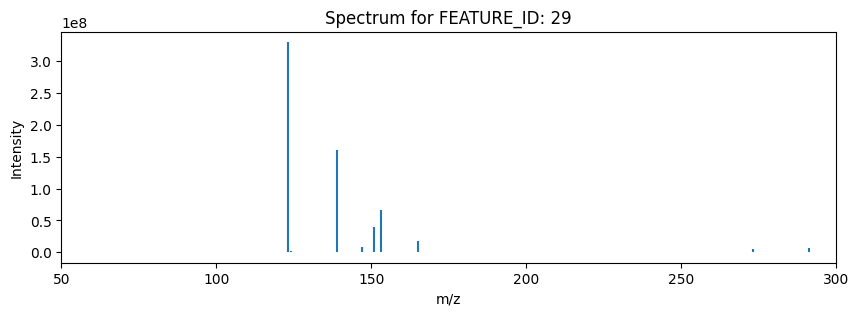

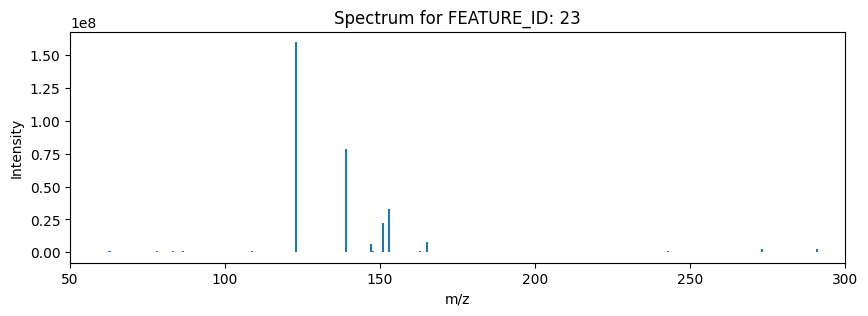

In [55]:
# List of MGF files and feature IDs
mgf_feature_pairs = [
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_1_2024_10_02.mgf', ['42']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_2_2024_10_02.mgf', ['50']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_3_2024_10_08.mgf', ['29']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_4_2024_10_08.mgf', ['23'])
]

# Loop over each file-feature pair and plot
for mgf_file, feature_ids in mgf_feature_pairs:
    plot_ms_spectra_direct_read(mgf_file, feature_ids, mz_min=50, mz_max=300)


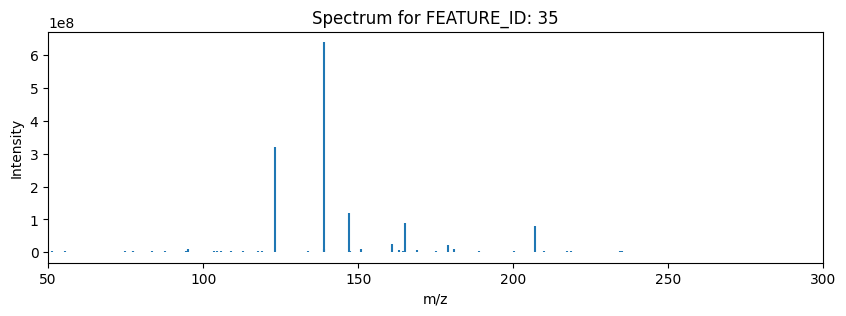

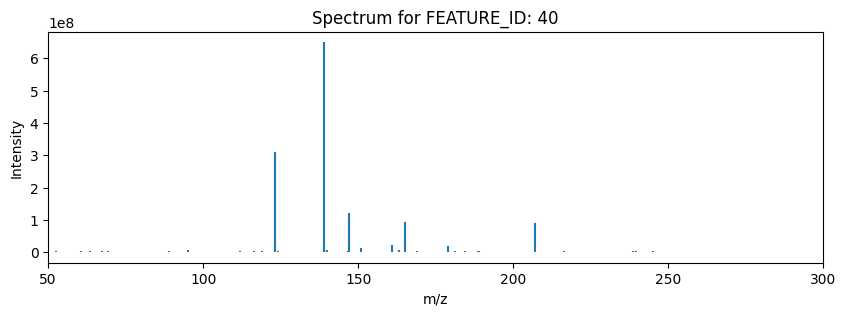

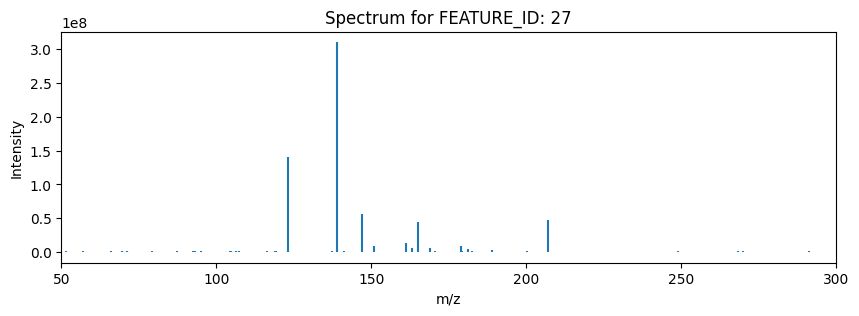

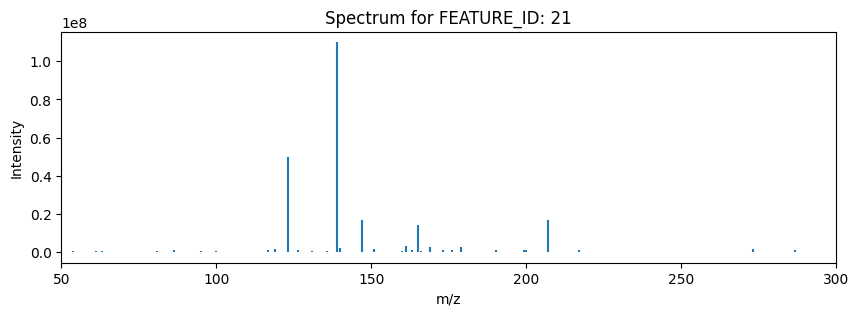

In [56]:
# List of MGF files and feature IDs
mgf_feature_pairs = [
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_1_2024_10_02.mgf', ['35']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_2_2024_10_02.mgf', ['40']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_3_2024_10_08.mgf', ['27']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_4_2024_10_08.mgf', ['21'])
]

# Loop over each file-feature pair and plot
for mgf_file, feature_ids in mgf_feature_pairs:
    plot_ms_spectra_direct_read(mgf_file, feature_ids, mz_min=50, mz_max=300)


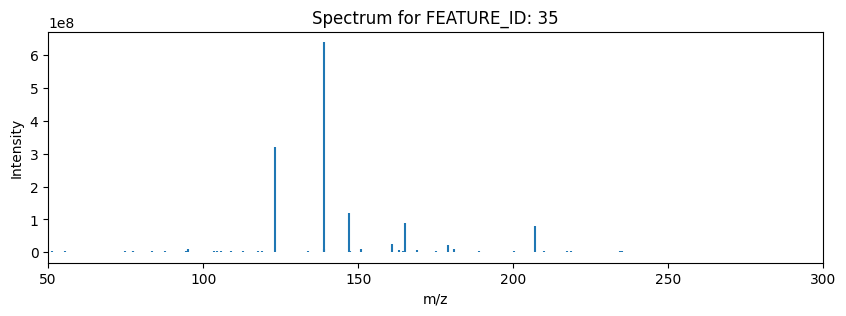

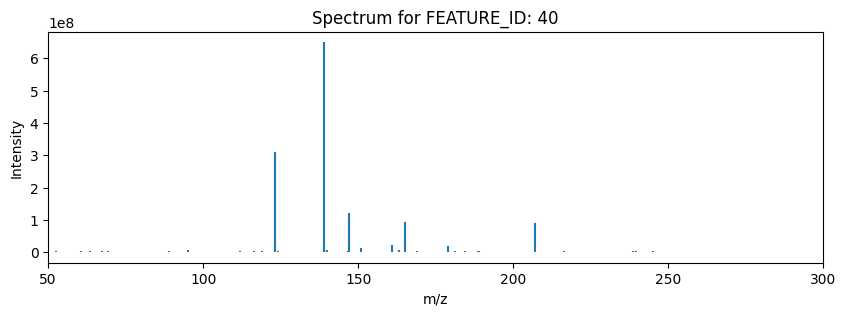

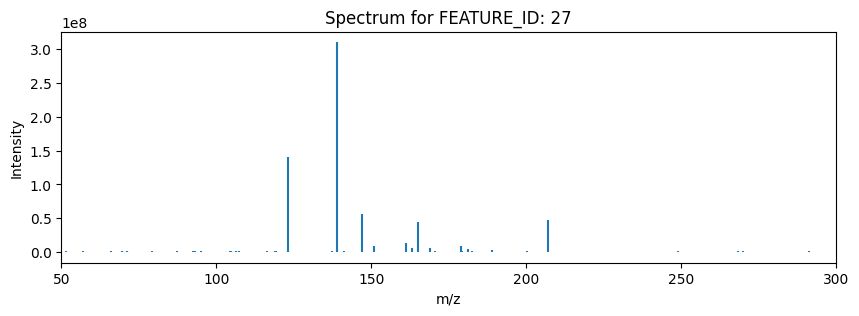

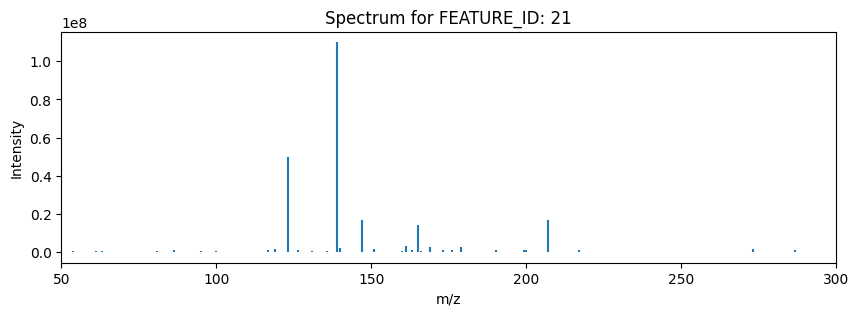

In [57]:
# List of MGF files and feature IDs
mgf_feature_pairs = [
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_1_2024_10_02.mgf', ['35']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_2_2024_10_02.mgf', ['40']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_3_2024_10_08.mgf', ['27']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_4_2024_10_08.mgf', ['21'])
]

# Loop over each file-feature pair and plot
for mgf_file, feature_ids in mgf_feature_pairs:
    plot_ms_spectra_direct_read(mgf_file, feature_ids, mz_min=50, mz_max=300)


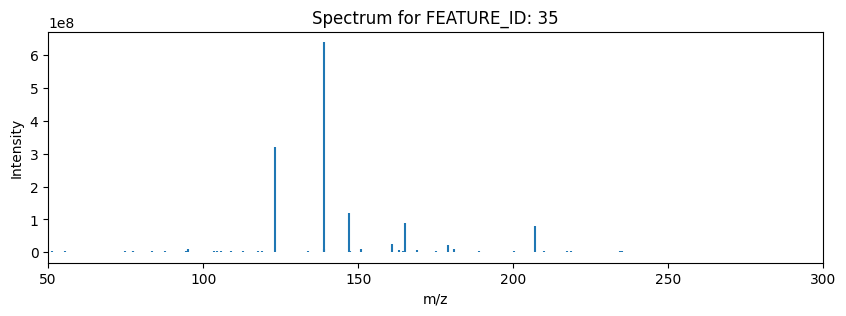

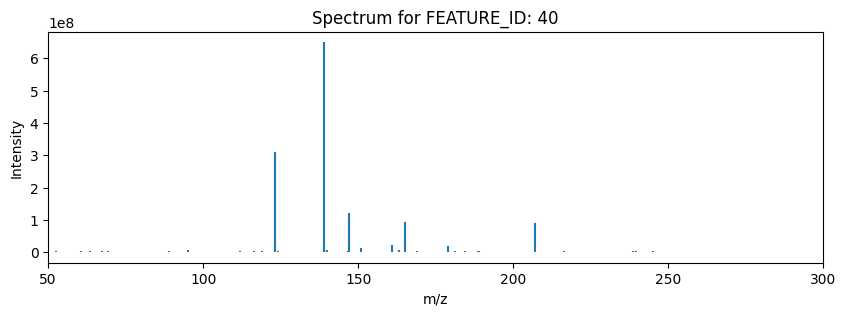

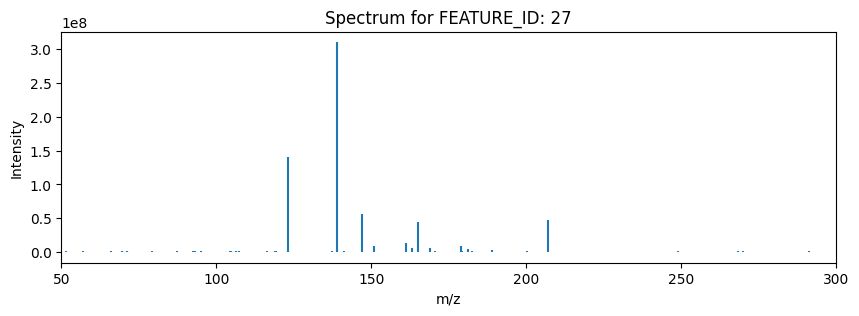

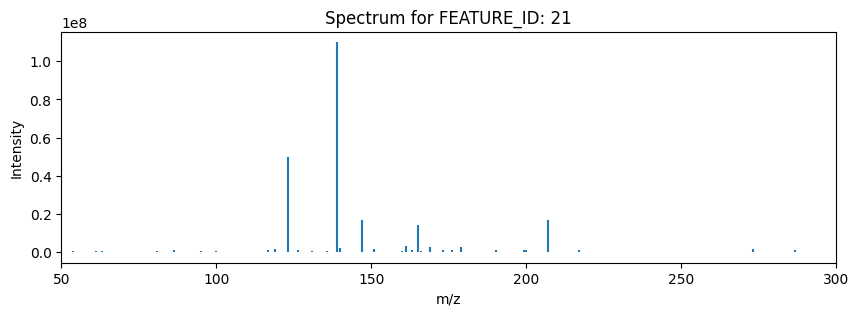

In [58]:
# List of MGF files and feature IDs
mgf_feature_pairs = [
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_1_2024_10_02.mgf', ['35']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_2_2024_10_02.mgf', ['40']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_3_2024_10_08.mgf', ['27']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_4_2024_10_08.mgf', ['21'])
]

# Loop over each file-feature pair and plot
for mgf_file, feature_ids in mgf_feature_pairs:
    plot_ms_spectra_direct_read(mgf_file, feature_ids, mz_min=50, mz_max=300)


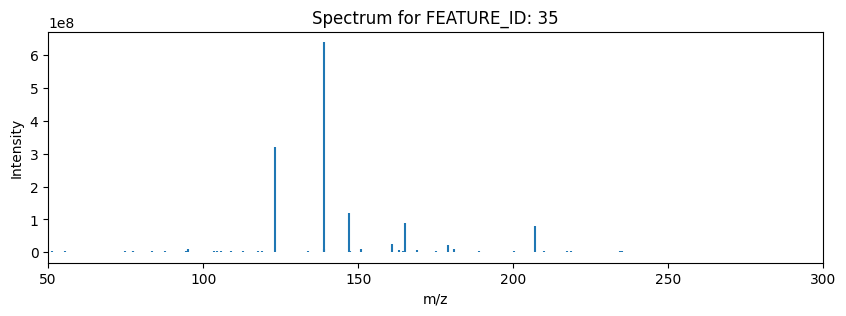

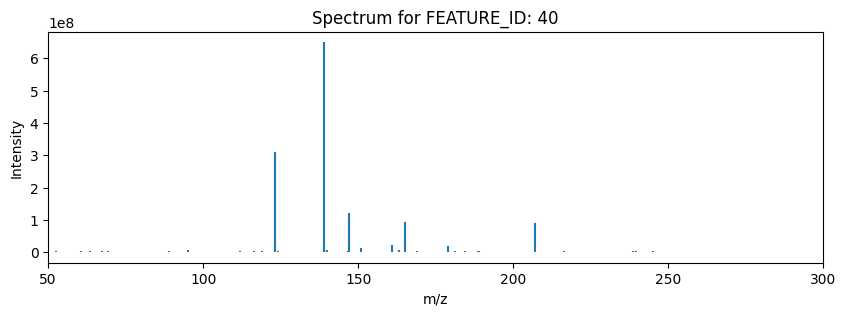

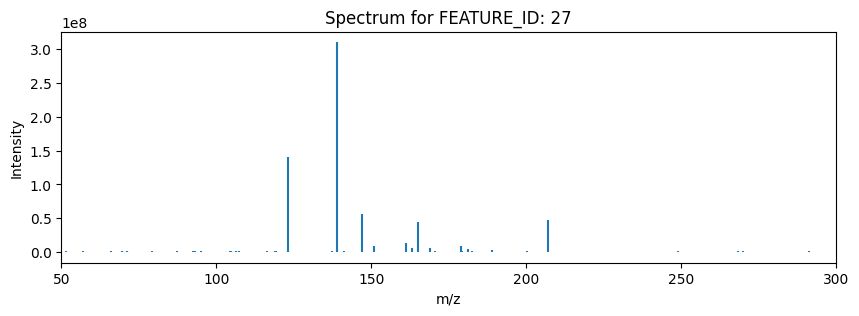

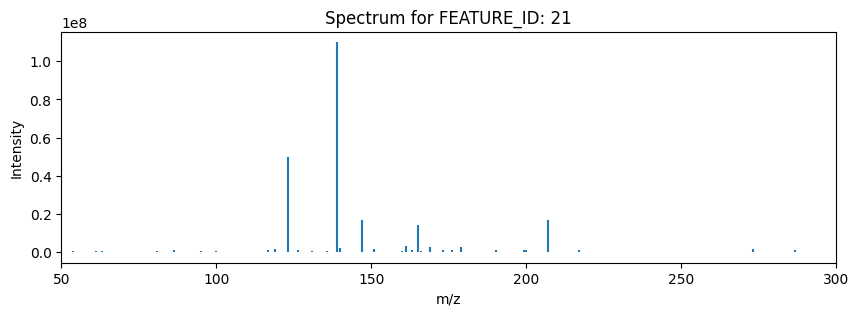

In [59]:
# List of MGF files and feature IDs
mgf_feature_pairs = [
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_1_2024_10_02.mgf', ['35']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_2_2024_10_02.mgf', ['40']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_3_2024_10_08.mgf', ['27']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_4_2024_10_08.mgf', ['21'])
]

# Loop over each file-feature pair and plot
for mgf_file, feature_ids in mgf_feature_pairs:
    plot_ms_spectra_direct_read(mgf_file, feature_ids, mz_min=50, mz_max=300)


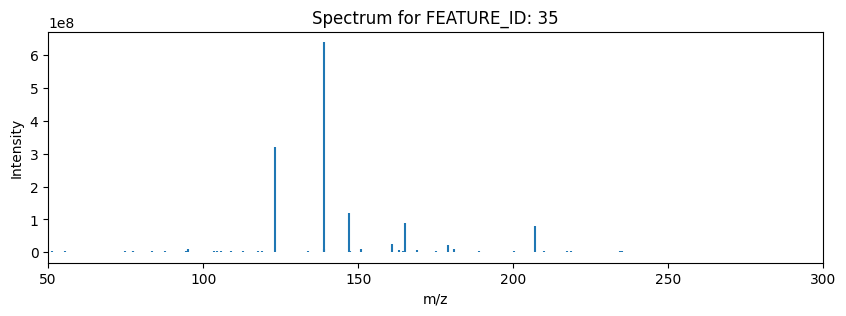

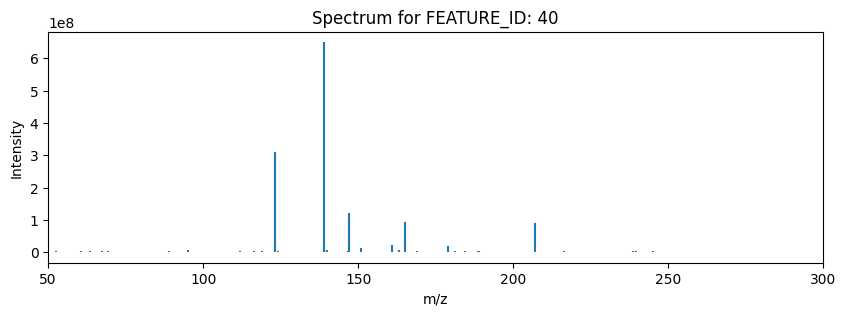

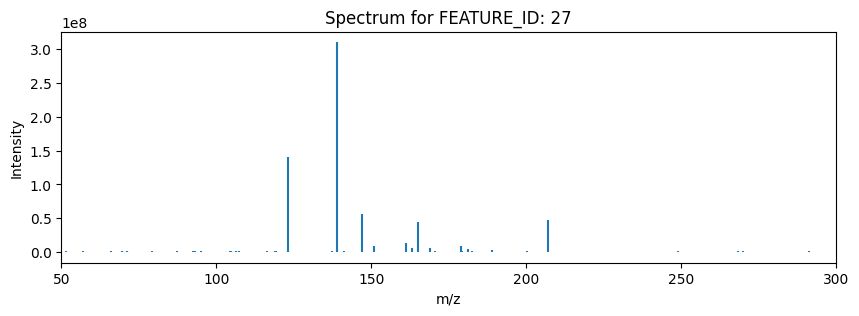

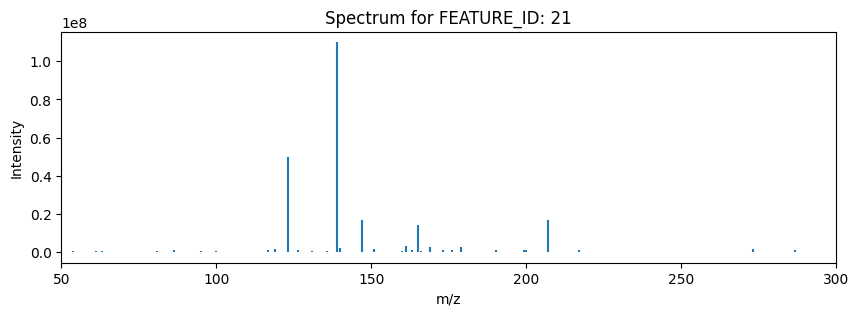

In [60]:
# List of MGF files and feature IDs
mgf_feature_pairs = [
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_1_2024_10_02.mgf', ['35']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_2_2024_10_02.mgf', ['40']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_3_2024_10_08.mgf', ['27']),
    (r'C:\Users\borge\Documents\Batch_correction_from_MZmine\CQ_Batches\Controles_Lote_4_2024_10_08.mgf', ['21'])
]

# Loop over each file-feature pair and plot
for mgf_file, feature_ids in mgf_feature_pairs:
    plot_ms_spectra_direct_read(mgf_file, feature_ids, mz_min=50, mz_max=300)
